In [1]:
import spacedecomp
from spacedecomp import Factorization
import torch
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.datasets import fetch_olivetti_faces
import numpy as np

In [2]:
x_train, y_train = fetch_olivetti_faces(return_X_y=True, shuffle=True, random_state=97)


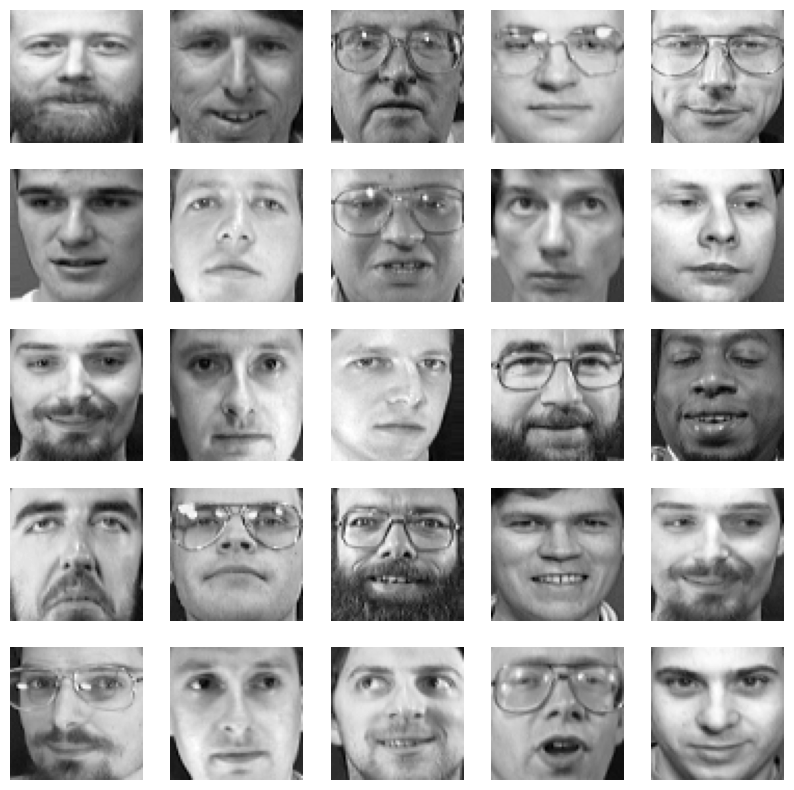

In [3]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i].reshape(64, 64), cmap='gray')
    plt.axis('off')

In [4]:
y_train.max() #number of people in total

39

In [5]:
Y = (x_train)*255
Y = Y.astype(int)

In [6]:
model = Factorization(Y, laten_dim=10, train_loadings=True, type='PNMF')

In [7]:
history = model.train(torch.tensor(Y), lr=1e-2, epochs=3000)

  0%|          | 0/3000 [00:00<?, ?it/s]

Finished training


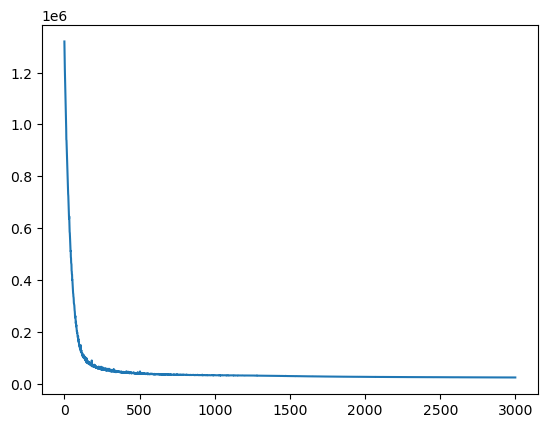

In [8]:
plt.plot(history)

### Visualize Factors

In [9]:
F = model.q_f.sample()

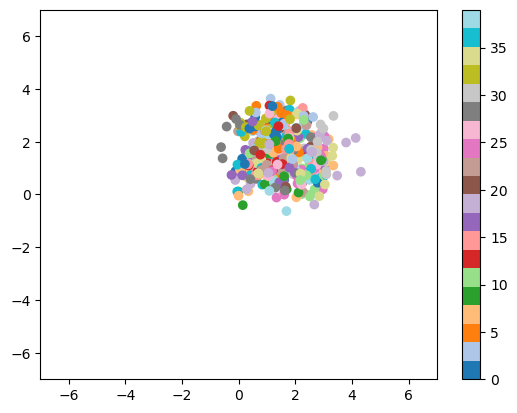

In [10]:
plt.scatter(F[:, 0], F[:, 1], c=y_train, cmap='tab20')
plt.ylim([-7, 7])
plt.xlim([-7, 7])
plt.colorbar()

### Visualize Loadings

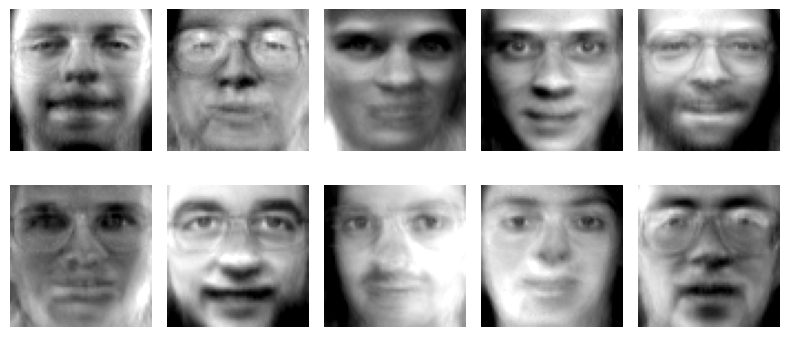

In [11]:
plt.figure(figsize=(8, 4), tight_layout=True)
for i in range(model.L):
    plt.subplot(2, 5, i+1)
    loading = torch.abs(model.W[:, i]).detach().cpu().numpy()
    loading = loading.reshape(64, 64)
    max_val = loading.max()
    loading = loading/max_val
    plt.imshow(loading, vmin=0, vmax=0.9, cmap='gray')
    plt.axis('off')